# Linear Regression

In this notebook we will learn how to train a linear regression model and make predictions with it using the <a href="https://scikit-learn.org/stable/" target="_blank">scikit-learn</a> library. 


A linear regression model is used to explain a certain variable $y$, based on a scalar variable $x$, or based on several variables ($x_1, x_2, \dots, x_n$) that we will represent in vector form as $\mathbf{x}$. In the first case, when the input is a single scalar variable $x \in \mathbb{R}$, we talk about univariate linear regression; and in the second case, when the input is $\mathbf{x} \in \mathbb{R}^n$, multivariate linear regression. As its name suggests, the model we will use in both cases is a linear function of the input variables.

**Note**: If you are running this in [a colab notebook](https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb), you should install the dependencies by running the following cell:

In [1]:
! pip install scikit-learn matplotlib

First we load the Boston house-prices dataset.

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

boston_X = boston.data
boston_y = boston.target
feature_names = boston.feature_names
print(feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Univariate linear regression

To simulate a univariate regression task we are going to use only one of the input features in the boston dataset: the average number of rooms per dwelling (RM).

Then we split the dataset in two sets for training and test respectively.

In [3]:
from sklearn.model_selection import train_test_split

# Use only one feature
new_X = boston_X[:, 5:6]

# Split the data into training/testing sets
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(new_X, boston_y, test_size=0.2, random_state=123)

print(boston_X_train.shape, boston_X_test.shape, boston_y_train.shape, boston_y_test.shape)

(404, 1) (102, 1) (404,) (102,)


Now we create an instance of the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression"><code>sklearn.linear_model.LinearRegression</code></a> class, and fit the model to our data with the <code>fit()</code> method. 

In [4]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(boston_X_train, boston_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The fitted model can now be used to make predictions using the <code>predict()</code> method.

In [5]:
# Make predictions using the testing set
boston_y_pred = regr.predict(boston_X_test)

Finally we can evaluate the performance of the model using the Mean Squared Error, and visualize the learned model as follows:

Mean squared error: 53.49


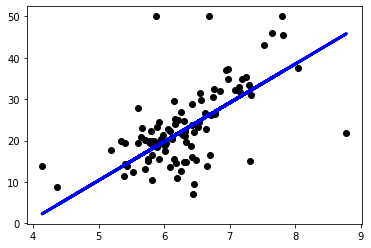

In [6]:
from sklearn.metrics import mean_squared_error

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(boston_y_test, boston_y_pred))


import matplotlib.pylab as plt

# Plot outputs
plt.scatter(boston_X_test, boston_y_test,  color='black')
plt.plot(boston_X_test, boston_y_pred, color='blue', linewidth=3)

Once the model has been trained we can get the estimated coefficients and the independent term  for the linear model as follows:

In [7]:
print(regr.coef_, regr.intercept_)

[9.37397303] -36.50950649940026


### Multivariate linear regression

For the multivariate case we can use all the 13 available input features.

In [8]:
# Split the data into training/testing sets (now using all features)
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(boston_X, boston_y, test_size=0.2, random_state=123)

print(boston_X_train.shape, boston_X_test.shape, boston_y_train.shape, boston_y_test.shape)

(404, 13) (102, 13) (404,) (102,)


The rest is exactly the same as in the univariate case. In this case we expect the MSE to be lower, since we have more discriminative information for learning a better model.

In [9]:
# Train the model using the training sets
regr.fit(boston_X_train, boston_y_train)

# Make predictions using the testing set
boston_y_pred = regr.predict(boston_X_test)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(boston_y_test, boston_y_pred))

Mean squared error: 28.19


Once the model has been trained we can get the estimated coefficients and the independent term  for the linear model as follows:

In [10]:
print(regr.coef_, regr.intercept_)

[-9.87931696e-02  4.75027102e-02  6.69491841e-02  1.26954150e+00
 -1.54697747e+01  4.31968412e+00 -9.80167937e-04 -1.36597953e+00
  2.84521838e-01 -1.27533606e-02 -9.13487599e-01  7.22553507e-03
 -5.43790245e-01] 31.83516412120617
